In [2]:
#importing libraries 
import numpy as np 
import pandas as pd 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier 
import seaborn as sbn

In [3]:
#Reading Dataset
data = pd.read_csv("D:\Data Science\Datasets\heart_cleveland_upload.csv") 
#Checking top 5 entries 
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


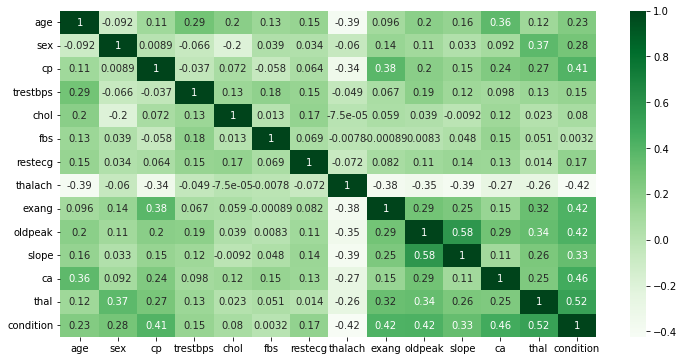

In [4]:
#Calculating the correlation to find dependence between two random variables or bivariate data
corr=data.corr()
plt.subplots(figsize=(12,6))
fig = sbn.heatmap(corr,cmap='Greens', annot=True)

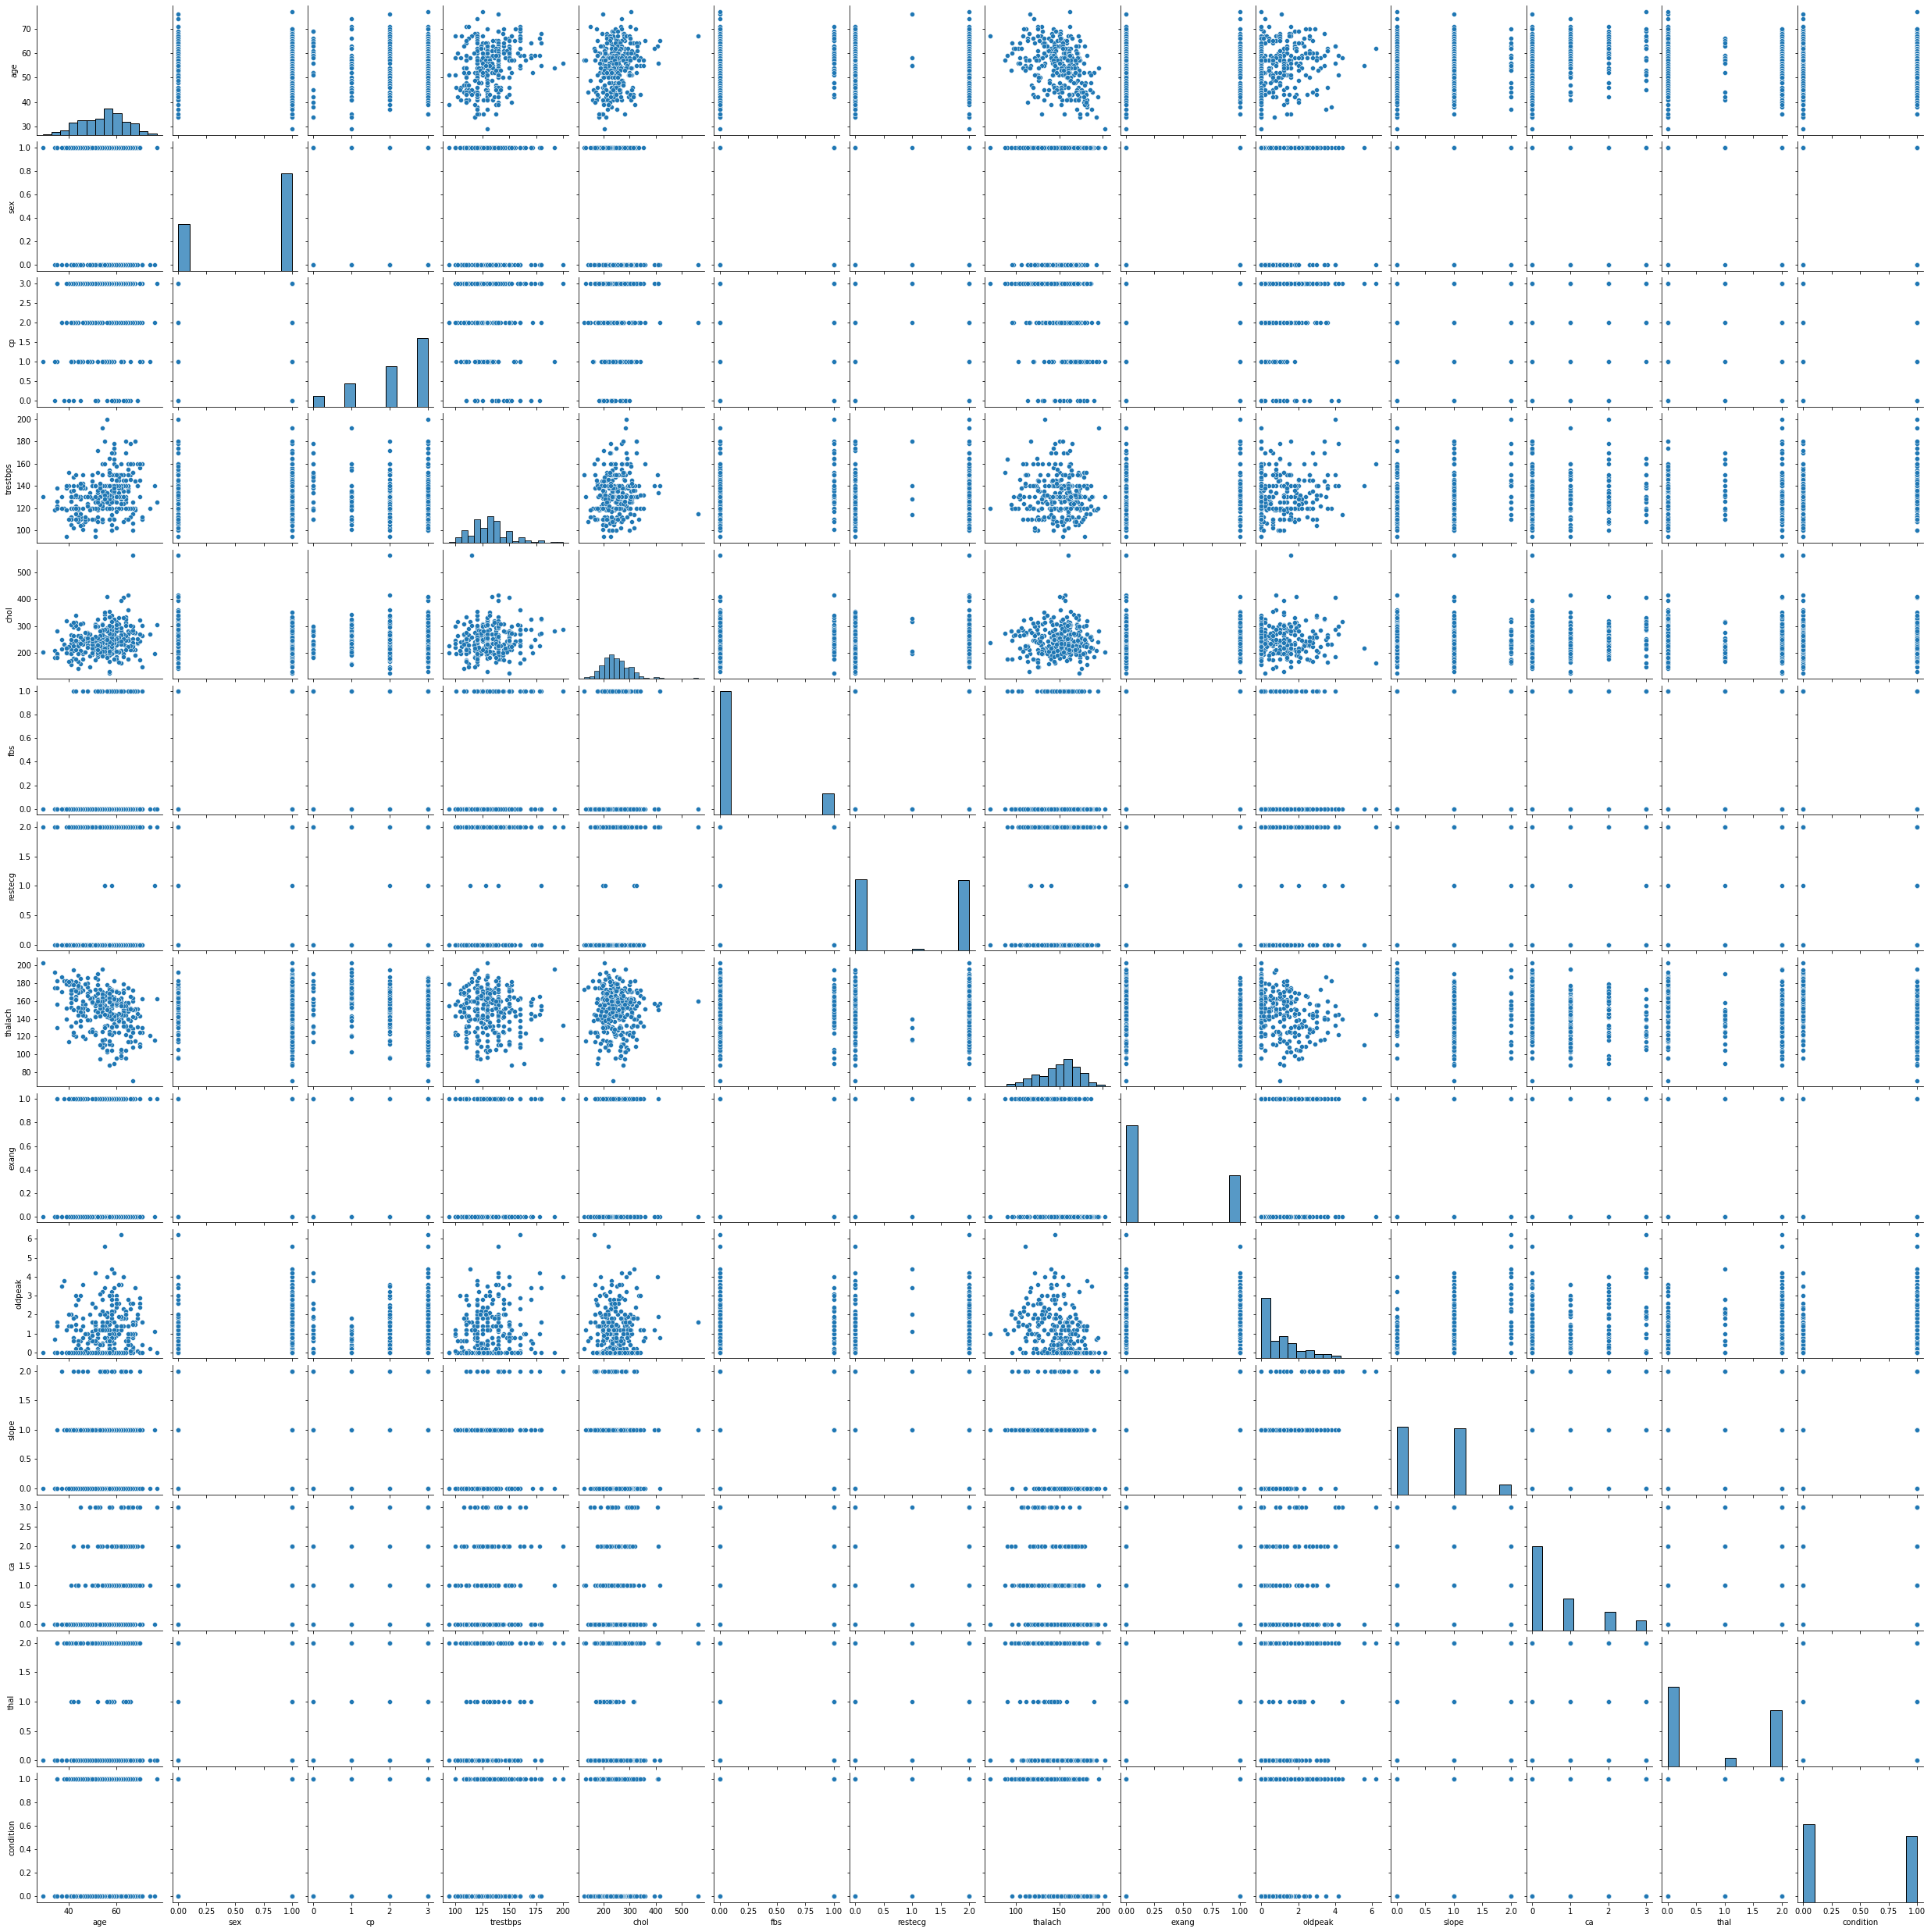

In [5]:
#Pairplot is used to visualize given data to find the relationship between them 
#where the variables can be continuous or categorical. 
sbn.pairplot(data)

In [6]:
#Checking the datatypes of all features 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [7]:
#Groupby is used to split the data into groups based on some criteria for ploting the pie-chart
data_target = data.groupby("condition").size() 
data_sex= data.groupby(["sex","condition"]).size() 
print(data_sex)

sex  condition
0    0             71
     1             25
1    0             89
     1            112
dtype: int64


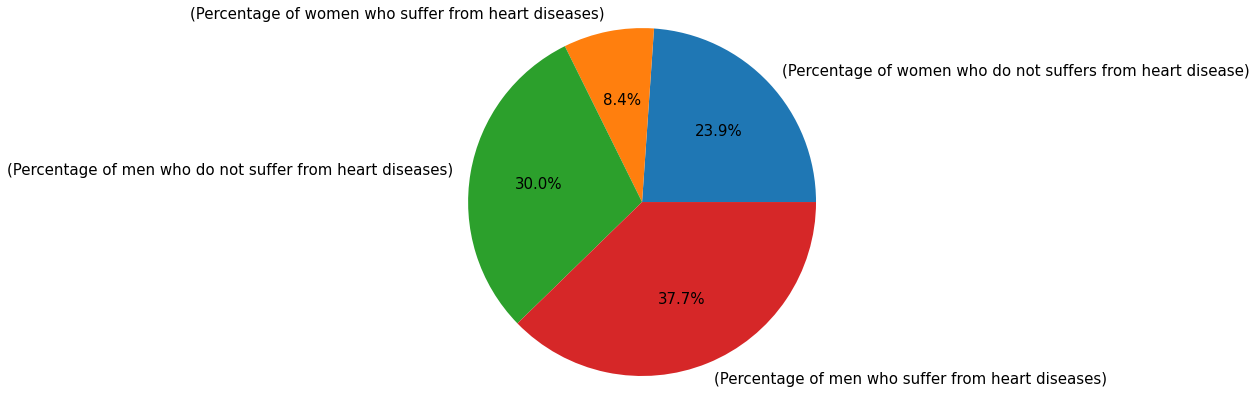

In [8]:
plt.pie(data_sex.values, labels = ["(Percentage of women who do not suffers from heart disease)", "(Percentage of women who suffer from heart diseases)", "(Percentage of men who do not suffer from heart diseases)", "(Percentage of men who suffer from heart diseases)"], 
        autopct ='%1.1f%%', radius =2, textprops = {"fontsize" : 15})
plt.show()

In [9]:
data_age = data.groupby(["age", "condition"]).size().head(50)

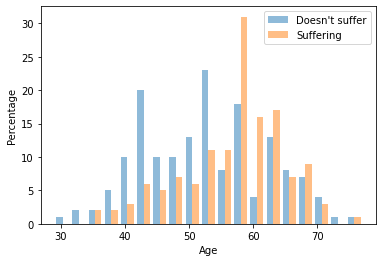

In [10]:
#Plotting the histogram for better EDA
plt.hist([data[data.condition==0].age, data[data.condition==1].age], bins =19,
        alpha =0.5, align ='mid', histtype = 'bar', orientation ='vertical', label = ["Doesn't suffer", "Suffering"])
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.legend()
plt.show()

In [11]:
#Finding total number of null values
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='chol'>

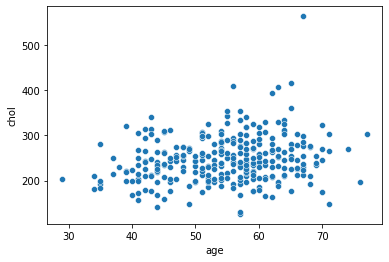

In [12]:
sbn.scatterplot(x = "age", y = "chol", data=data, palette = "deep")

In [13]:
#Split Data
x = data.iloc[:,0:13]
y = data.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,
                                                   random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

#### Defining model dict and model list

In [14]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier (n_neighbors = 8, metric = "minkowski")
knn.fit(X_train, y_train)

y_pred1 = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
accuracy_score_knn = accuracy_score(y_pred1, y_test)
accuracy_score_knn

0.7833333333333333

In [15]:
cm

array([[21,  1],
       [12, 26]], dtype=int64)

In [16]:
# Create SVM Classifier
classifier = OneVsOneClassifier(LinearSVC(random_state=10))
classifier.fit(X_train, y_train)
y_pred2 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
accuracy_score_svm = accuracy_score(y_pred2, y_test)
accuracy_score_svm

0.8333333333333334

In [17]:
cm

array([[20,  2],
       [ 8, 30]], dtype=int64)

In [18]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(X_train, y_train)
y_pred3 = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
accuracy_score_dtc = accuracy_score(y_pred3, y_test)
accuracy_score_dtc

0.65

In [19]:
cm

array([[18,  4],
       [17, 21]], dtype=int64)

In [20]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 11, criterion = "entropy")
rfc.fit(X_train, y_train)
y_pred4 = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)
accuracy_score_rfc = accuracy_score(y_pred4, y_test)
accuracy_score_rfc

0.7666666666666667

In [21]:
cm

array([[20,  2],
       [12, 26]], dtype=int64)

In [22]:
# Accuracies of Diffferent Model
models = [accuracy_score_knn, accuracy_score_svm,accuracy_score_dtc,accuracy_score_rfc]
accuracy_scores = []

for model in models:
    accuracy_scores.append(model)
print(accuracy_scores)

[0.7833333333333333, 0.8333333333333334, 0.65, 0.7666666666666667]


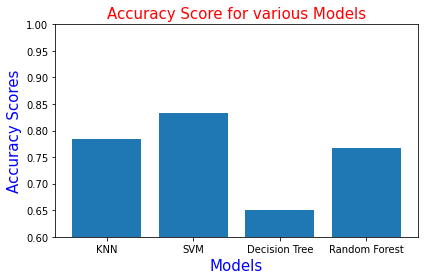

In [23]:
# Plotting the graph
plt.bar(['KNN', 'SVM', 'Decision Tree', 'Random Forest'], accuracy_scores)
plt.ylim(0.6, 1.0)
plt.title("Accuracy Score for various Models", color = "r", fontsize = 15 )
plt.xlabel('Models', fontsize = 15, color = 'b')
plt.ylabel('Accuracy Scores', fontsize = 15, color = 'b')
plt.tight_layout()
plt.show()